# Lab2

## Artyom Iudin BVT2101

<div class="alert alert-block alert-info">
<b>Chapter navigation</b> isn't working on github. Download .ipynb to use it.

If it is still not working close tab with notebook and open it again.
</div>

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Tail of CSV](#tail)
2. [How many rows and how many unique item names](#item_name)
3. [Is there null values?](#null_val)
4. [Price column](#price_col)
5. [Top 5 items](#top_five)
6. [One chicken bowl](#chicken_bowl)
7. [Mean price for order and mean quantity](#order_id)
8. [Only 1 quantity in order](#one_quantity)
9. [Most popular item name](#most_popular_item)
10. [Self-made DataFrame](#df_np)
11. [Hist plots](#hists)
12. [Sum dependece of days](#plot)
13. [Scatter plot](#scatter)
      1. [In general](#in_general)
      2. [Per order](#per_order)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [1]:
import numpy as np              # for 10 task
import pandas as pd
import matplotlib.pyplot as plt # for 11 task

# 1. [Tail of CSV](#chapters) <a class="anchor" id="tail"></a>

In [2]:
df = pd.read_csv('../datasets/data.csv')
df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


# 2. [How many rows and how many unique item names](#chapters) <a class="anchor" id="item_name"></a>

In [3]:
print(f"There are {df.order_id.value_counts().count()} sales in the table")

There are 1834 sales in the table


In [4]:
print(f"There are {df.item_name.value_counts().count()} unique sales")

There are 50 unique sales


# 3. [Is there null values?](#chapters) <a class="anchor" id="null_val"></a>

In [5]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In 'choice_description'

In [6]:
df.fillna({'choice_description':""}, inplace=True)

In [7]:
df.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

# 4. [Price column](#chapters) <a class="anchor" id="price_col"></a>

In [8]:
print(f"Price column type is {df['item_price'].dtype}")

Price column type is object


It is object (string)

In [9]:
df['prices'] = df['item_price'].replace('[\$,]', '', regex=True).astype(np.float32)
df.sample(10)

,order_id,quantity,item_name,choice_description,item_price,prices
735,304,1,Canned Soft Drink,[Sprite],$1.25,1.25
1613,652,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$10.98,10.98
180,81,1,Canned Soda,[Dr. Pepper],$1.09,1.09
3821,1532,1,Veggie Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",$8.49,8.49
2056,829,1,Canned Soft Drink,[Sprite],$1.25,1.25
4483,1786,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$11.25,11.25
31,16,1,Steak Burrito,"[[Roasted Chili Corn Salsa (Medium), Fresh Tom...",$8.99,8.99
975,400,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.25,11.25
741,305,1,Steak Burrito,[Roasted Chili Corn Salsa],$9.25,9.25
94,41,1,Chips and Guacamole,,$4.45,4.45


In [10]:
prices_stats = df['prices'].describe()
print(f"Mean price = {prices_stats['mean']:.2f},\
 min = {prices_stats['min']}, max = {prices_stats['max']}")

Mean price = 7.46, min = 1.090000033378601, max = 44.25


In [11]:
df.drop('item_price', axis='columns', inplace=True)
df.sample(10)

,order_id,quantity,item_name,choice_description,prices
2580,1023,2,Chicken Bowl,"[[Roasted Chili Corn Salsa (Medium), Fresh Tom...",16.98
3100,1236,1,Chips and Guacamole,,3.99
1151,475,1,Barbacoa Burrito,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",9.25
2867,1140,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
2686,1067,1,Carnitas Burrito,"[Fresh Tomato Salsa, [Cheese, Lettuce]]",9.25
3962,1587,1,Canned Soft Drink,[Coke],1.25
157,71,1,Veggie Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
450,195,1,Barbacoa Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
3655,1461,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
4195,1674,1,Chips and Guacamole,,4.45


# 5. [Top 5 items](#chapters) <a class="anchor" id="top_five"></a>

In [12]:
df_without_dub = df.drop_duplicates(['choice_description'])
df_without_dub = df_without_dub.sort_values(['prices'])

print('Топ 5 самых дешёвых')
print(df_without_dub[['choice_description', 'prices']].head(5))
print('Топ 5 самых дорогих')
print(df_without_dub[['choice_description', 'prices']].tail(5))

Топ 5 самых дешёвых
    choice_description  prices
117  [Diet Dr. Pepper]    1.09
126        [Coca Cola]    1.09
28        [Dr. Pepper]    1.09
346         [Lemonade]    1.25
263             [Coke]    1.25
Топ 5 самых дорогих
                                     choice_description     prices
2954  [[Tomatillo-Green Chili Salsa (Medium), Roaste...  22.959999
4427  [Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ...  23.500000
1753  [Tomatillo Green Chili Salsa, [Fajita Vegetabl...  23.500000
3334  [Tomatillo Green Chili (Medium), [Rice, Black ...  26.070000
409   [[Fresh Tomato Salsa (Mild), Tomatillo-Green C...  32.939999


# 6. [One chicken bowl](#chapters) <a class="anchor" id="chicken_bowl"></a>

In [13]:
print(f"There are\
 {df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)].quantity.count()}\
 chicken bowl orders")

There are 33 chicken bowl orders


# 7. [Mean price for order and mean quantity](#chapters) <a class="anchor" id="order_id"></a>

In [14]:
print(f"Mean price for order is {df.groupby('order_id').prices.sum().mean():.2f} $,\
 mean quantity for order is {df.groupby('order_id').quantity.sum().mean():.0f}")

Mean price for order is 18.81 $, mean quantity for order is 3


# 8. [Only 1 quantity in order](#chapters) <a class="anchor" id="one_quantity"></a>

In [15]:
print(f"There are\
 {(df.groupby('order_id').quantity.sum() == 1).sum()} orders with only 1 quantity")

There are 56 orders with only 1 quantity


# 9. [Most popular item name](#chapters) <a class="anchor" id="most_popular_item"></a>

In [16]:
print(f"Most popular product is\
 {df.groupby('item_name').quantity.sum().sort_values().index[-1]} with\
 {df.groupby('item_name').quantity.sum().sort_values().iloc[-1]} quantities")


Most popular product is Chicken Bowl with 761 quantities


# 10. [Self-made DataFrame](#chapters) <a class="anchor" id="df_np"></a>

In [17]:
matrix = np.random.rand(10, 3)
matrix

array([[0.36632915, 0.3710707 , 0.04577698],
       [0.06067883, 0.20767963, 0.82772593],
       [0.86004425, 0.55161199, 0.50232145],
       [0.27419027, 0.07957964, 0.80666697],
       [0.44121259, 0.96733896, 0.36061607],
       [0.19255986, 0.28553002, 0.70121006],
       [0.87283938, 0.59448014, 0.01197074],
       [0.61084597, 0.02327528, 0.66824193],
       [0.40460464, 0.68551038, 0.49919461],
       [0.24136426, 0.5544214 , 0.21365148]])

In [18]:
df_np = pd.DataFrame(data=matrix[:, 1:],
                     columns=['column1', 'column2'],
                     index=matrix[:, 0])

df_np

,column1,column2
0.366329,0.371071,0.045777
0.060679,0.207680,0.827726
0.860044,0.551612,0.502321
0.274190,0.079580,0.806667
0.441213,0.967339,0.360616
0.192560,0.285530,0.701210
0.872839,0.594480,0.011971
0.610846,0.023275,0.668242
0.404605,0.685510,0.499195
0.241364,0.554421,0.213651


In [19]:
df_np.to_csv('./df_np.csv',index=False, header=False)

# 11. [Hist plots](#chapters) <a class="anchor" id="hists"></a>

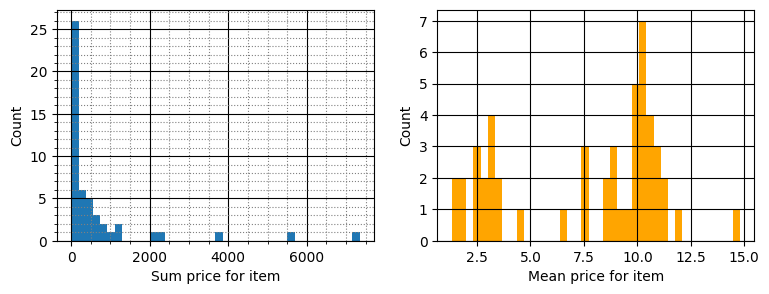

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

df.groupby('item_name').prices.sum().hist(bins=40, ax=ax[0])
df.groupby('item_name').prices.mean().hist(bins=40, ax=ax[1], color='orange')

ax[0].set_xlabel("Sum price for item")
ax[0].set_ylabel("Count")

ax[0].grid(which='major',
        color = 'k')

ax[0].minorticks_on()
ax[0].grid(which='minor',
        color = 'gray',
        linestyle = ':')

ax[1].set_xlabel("Mean price for item")
ax[1].set_ylabel("Count")

ax[1].grid(which='major',
        color = 'k')

# 12. [Sum dependeces of days](#chapters) <a class="anchor" id="plot"></a>

,order_id,quantity,item_name,choice_description,prices,dates,date
2416,958,1,Bottled Water,,1.50,2024-03-03,2024-03-14
623,257,1,Veggie Burrito,[Tomatillo Green Chili Salsa],8.75,2024-03-28,2024-04-15
2333,929,1,Bottled Water,,1.50,2024-04-29,2024-04-11


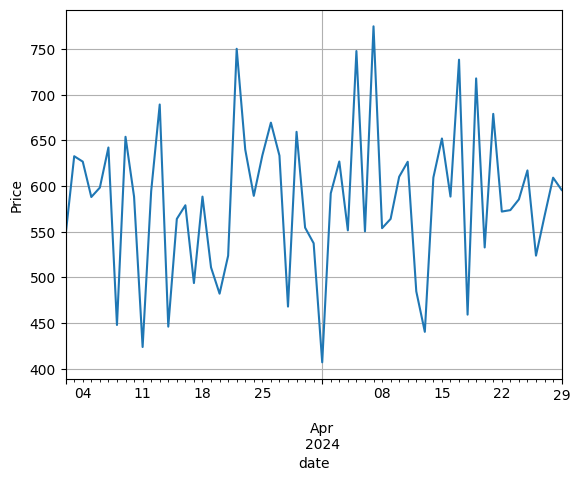

In [37]:
np.random.seed(42)
base_date = np.datetime64('2024-03-01')
bimonthly_days = np.random.randint(1, 60, df.shape[0])
dates = base_date + bimonthly_days
df['date'] = dates

df.groupby('date').prices.sum().plot(grid=True, ylabel='Price')
df.sample(3)

# 13. [Price dependecy on quantity](#chapters) <a class="anchor" id="scatter"></a>

## 13.1 [In general](#chapters) <a class="anchor" id="in_general"></a>

<Axes: xlabel='quantity', ylabel='prices'>

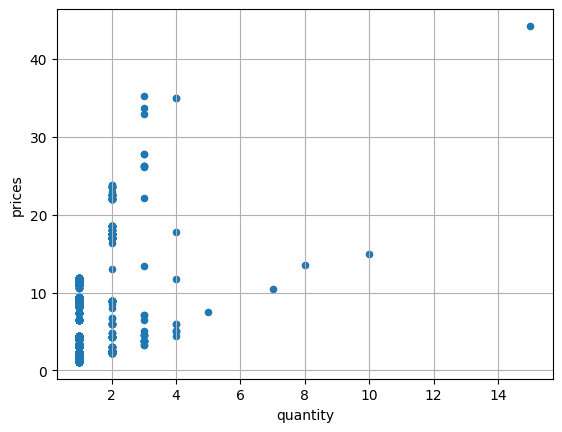

In [22]:
df.plot.scatter(x='quantity', y='prices', grid=True)

## 13.2 [Per order](#chapters) <a class="anchor" id="per_order"></a>

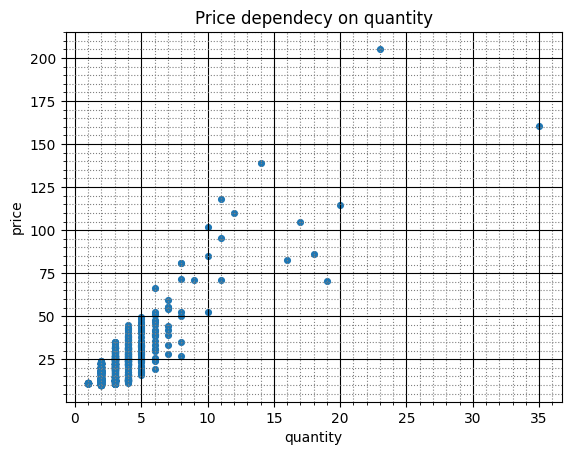

In [23]:
x = df.groupby('order_id').quantity.sum().values
y = df.groupby('order_id').prices.sum().values

plt.scatter(x=x, y=y, s=17)

plt.xlabel("quantity")
plt.ylabel("price")
plt.title('Price dependecy on quantity')

plt.grid(which='major',
        color = 'k')

plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.savefig("./scatter.pdf")